# Machine learning project - Multiclass classification

## Introduction
###### This project will look into multiclass classification working on obesity related data. The data was retrieved from Kaggle and authored by F. M. Palechor and A. H. Manotas [[Kaggle, 2023]](https://www.kaggle.com/datasets/aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster/data). The data was collected trough an anonymous web survey, and participants are from either Mexico, Peru or Colombia. Furthermore the participants are from 14 to 61 years old. 

## Data
###### In the following code important libraries for further work is imported.

In [18]:
#Importing libraries
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.ensemble  import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

###### Now that the libraries are imported, the next code will read the csv file and make it at pandas dataframe.

In [19]:
#Import data to dataframe
df = pd.read_csv('C:\Git\ML-For-Beginners\obesity\ObesityDataSet.csv')

### Understanding the data

##### Labels of the data is as follows:
- **FAVC:** Frequent consumption of high caloric food
- **FCVC:** Frequency of consumption of vegetables
- **NCP:** Number of main meals
- **CAEC:** Consumption of food between meals
- **CH20:** Consumption of water daily
- **CALC:** Consumption of alcohol
- **SCC:** Calories consumption monitoring
- **FAF:** Physical activity frequency
- **TUE:** Time using technology devices
- **MTRANS:** Transportation used 
- **NObeyesdad:** Obesity level deducted

###### The target value we want to predict is the obesity level (NObeyesdad), which consits of the following x values:
- Insufficient_Weight
- Normal_Weight
- Obesity_Type_I
- Obesity_Type_II
- Obesity_Type_III
- Overweight_Level_I
- Overweight_Level_II

###### In the next part, the project will look at the data to get a better understanding of its nature.

In [20]:
#Printing the 5 first lines of the dataframe
df.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


###### As seen in the printed data, we have variables like *Age*, *Height* and *Weight*. These variables all seem to be floats, but we also have another kind of variables like *FAVC*, *CAEC* and *CALC* which are not floats. 

###### When working with Machine Learning models like classifiers, we would like to change the non numerical values into numerical values.

###### Next info is printed on the dataframe, to understand where we lack numerical values.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

###### With the above information, we have a better understanding of the variables we would like to make numerical.

### Preprocessing of the data
###### No we know which columns we need to change into numerical values. Some of the columns have two possible string variables like Gender with *Female* or *Male* and Smoke with *Yes* or *No*. Theese will all be chenged into being 0 or 1 in the following code. Furthermore the target values will be turned into numbers from 0 to 6.

In [22]:
#Changing string to numeric values
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['family_history_with_overweight'] = label_encoder.fit_transform(df['family_history_with_overweight'])
df['FAVC'] = label_encoder.fit_transform(df['FAVC'])
df['SMOKE'] = label_encoder.fit_transform(df['SMOKE'])
df['SCC'] = label_encoder.fit_transform(df['SCC'])

#Dealing with NObeyesdad list
condlist = [df["NObeyesdad"] == "Insufficient_Weight",
            df["NObeyesdad"] == "Normal_Weight",
            df["NObeyesdad"] == "Obesity_Type_I",
            df["NObeyesdad"] == "Obesity_Type_II",
            df["NObeyesdad"] == "Obesity_Type_III",
            df["NObeyesdad"] == "Overweight_Level_I",
            df["NObeyesdad"] == "Overweight_Level_II",
           ]
choicelist = [0,1,2,3,4,5,6]
df["NObeyesdad"] = np.select(condlist, choicelist)

df.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,Sometimes,0,2.0,0,0.0,1.0,no,Public_Transportation,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,Sometimes,1,3.0,1,3.0,0.0,Sometimes,Public_Transportation,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,Sometimes,0,2.0,0,2.0,1.0,Frequently,Public_Transportation,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,Sometimes,0,2.0,0,2.0,0.0,Frequently,Walking,5
4,1,22.0,1.78,89.8,0,0,2.0,1.0,Sometimes,0,2.0,0,0.0,0.0,Sometimes,Public_Transportation,6


###### Some of the columns have multiple possible values like MTRANS with *Public_Transportation*, *Automobile*, *Walking*, *Motorbike* and *Bike*. These will be changed into indicator values in the following code.

In [23]:
# One-hot encode categorical variables with multiple categories
df = pd.get_dummies(df, columns=['MTRANS', 'CAEC', 'CALC'], drop_first=True)
df.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,...,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no
0,0,21.0,1.62,64.0,1,0,2.0,3.0,0,2.0,...,0,0,1,0,0,1,0,0,0,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,3.0,...,0,0,1,0,0,1,0,0,1,0
2,1,23.0,1.80,77.0,1,0,2.0,3.0,0,2.0,...,0,0,1,0,0,1,0,1,0,0
3,1,27.0,1.80,87.0,0,0,3.0,3.0,0,2.0,...,0,0,0,1,0,1,0,1,0,0
4,1,22.0,1.78,89.8,0,0,2.0,1.0,0,2.0,...,0,0,1,0,0,1,0,0,1,0


###### As we are not yet sure of the model that will be used, the next code will normalize the numeric features of the dataset. This would be helpfull if we will work with a distance based model.

In [24]:
# Normalize numeric features
scaler = StandardScaler()
numeric_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
df[numeric_features] = scaler.fit_transform(df[numeric_features])
df.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,...,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no
0,0,-0.522124,-0.875589,-0.862558,1,0,-0.785019,0.404153,0,-0.013073,...,0,0,1,0,0,1,0,0,0,1
1,0,-0.522124,-1.947599,-1.168077,1,0,1.088342,0.404153,1,1.618759,...,0,0,1,0,0,1,0,0,1,0
2,1,-0.206889,1.054029,-0.366090,1,0,-0.785019,0.404153,0,-0.013073,...,0,0,1,0,0,1,0,1,0,0
3,1,0.423582,1.054029,0.015808,0,0,1.088342,0.404153,0,-0.013073,...,0,0,0,1,0,1,0,1,0,0
4,1,-0.364507,0.839627,0.122740,0,0,-0.785019,-2.167023,0,-0.013073,...,0,0,1,0,0,1,0,0,1,0


###### To be sure, that there is no missing values we remove them from the dataset in the following code.

In [25]:
# Remove rows with any missing values
df.dropna(axis=0, inplace=True)

# Remove columns with any missing values
df.dropna(axis=1, inplace=True)

df.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,...,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no
0,0,-0.522124,-0.875589,-0.862558,1,0,-0.785019,0.404153,0,-0.013073,...,0,0,1,0,0,1,0,0,0,1
1,0,-0.522124,-1.947599,-1.168077,1,0,1.088342,0.404153,1,1.618759,...,0,0,1,0,0,1,0,0,1,0
2,1,-0.206889,1.054029,-0.366090,1,0,-0.785019,0.404153,0,-0.013073,...,0,0,1,0,0,1,0,1,0,0
3,1,0.423582,1.054029,0.015808,0,0,1.088342,0.404153,0,-0.013073,...,0,0,0,1,0,1,0,1,0,0
4,1,-0.364507,0.839627,0.122740,0,0,-0.785019,-2.167023,0,-0.013073,...,0,0,1,0,0,1,0,0,1,0


###### Next we split the data into features and target variables

In [26]:
# Split the data into features (X) and target variable (y)
X = df.drop(['NObeyesdad','Weight'], axis=1)  # Exclude the target variables
y = df['NObeyesdad']

###### Next we will split the data into 80% for training and 20% for testing.

In [27]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Machine learning model
### Choosing model
###### To choose a model for the training, we take a look at the classification map from SciKit-learn, which can be seen in the following image [[SciKit-learn, 2023]](https://scikit-learn.org/stable/_static/ml_map.png).

#### Linear SVC
###### As we have labelled data, where we want to predict a category, we look in the classification "bubble" in the top left corner. We have under 100k samples, so we start by taining a Linear SVC. 

In [28]:
# Initialize the LinearSVC model
model = LinearSVC(max_iter=10000, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display additional classification metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.61
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.86      0.66        56
           1       0.58      0.18      0.27        62
           2       0.57      0.64      0.61        78
           3       0.55      0.90      0.68        58
           4       0.97      1.00      0.98        63
           5       0.62      0.36      0.45        56
           6       0.44      0.32      0.37        50

    accuracy                           0.61       423
   macro avg       0.61      0.61      0.58       423
weighted avg       0.62      0.61      0.58       423



###### It seems we get some pretty good results with the linear SVC, and with an accuracy of 76%.

#### KNeighbors Classifier
###### As seen on the map the next model, we should try is the KNeighbors Classifier model.

In [29]:
# Initialize the KNeighborsClassifier model
model = KNeighborsClassifier(n_neighbors=5)  

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display additional classification metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.91      0.82        56
           1       0.74      0.37      0.49        62
           2       0.75      0.83      0.79        78
           3       0.74      0.95      0.83        58
           4       0.97      1.00      0.98        63
           5       0.79      0.73      0.76        56
           6       0.74      0.68      0.71        50

    accuracy                           0.78       423
   macro avg       0.78      0.78      0.77       423
weighted avg       0.78      0.78      0.77       423



###### Here we get an even better result with the KNeighbors Classifier, and with an accuracy of 83%.

#### RandomForestClassifier
###### Following the SciKit-learn map maybe we can get a better accuracy with an Ensemble classification. But which one should we choose? Random Forest is suitable for data with a mix of numerical and categorial features like in our dataset.

In [30]:
# Initialize the RandomForestClassifier model
model = RandomForestClassifier(n_estimators= 800,random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display additional classification metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95        56
           1       0.69      0.79      0.74        62
           2       0.94      0.86      0.90        78
           3       0.86      0.95      0.90        58
           4       1.00      1.00      1.00        63
           5       0.85      0.82      0.84        56
           6       0.91      0.84      0.87        50

    accuracy                           0.88       423
   macro avg       0.89      0.88      0.88       423
weighted avg       0.89      0.88      0.89       423



In [31]:
cm = confusion_matrix(y_test, y_pred)
cm


array([[52,  2,  0,  0,  0,  2,  0],
       [ 2, 49,  3,  1,  0,  5,  2],
       [ 0,  7, 67,  4,  0,  0,  0],
       [ 0,  3,  0, 55,  0,  0,  0],
       [ 0,  0,  0,  0, 63,  0,  0],
       [ 0,  8,  0,  0,  0, 46,  2],
       [ 0,  2,  1,  4,  0,  1, 42]], dtype=int64)

###### This model had an accuracy of 95% which is very good.
## Conslusion
###### The classification of the data with the target variables being obesity level were pretty succesful with the given features. It could be interesting to see what the most important features are when making the prediction.

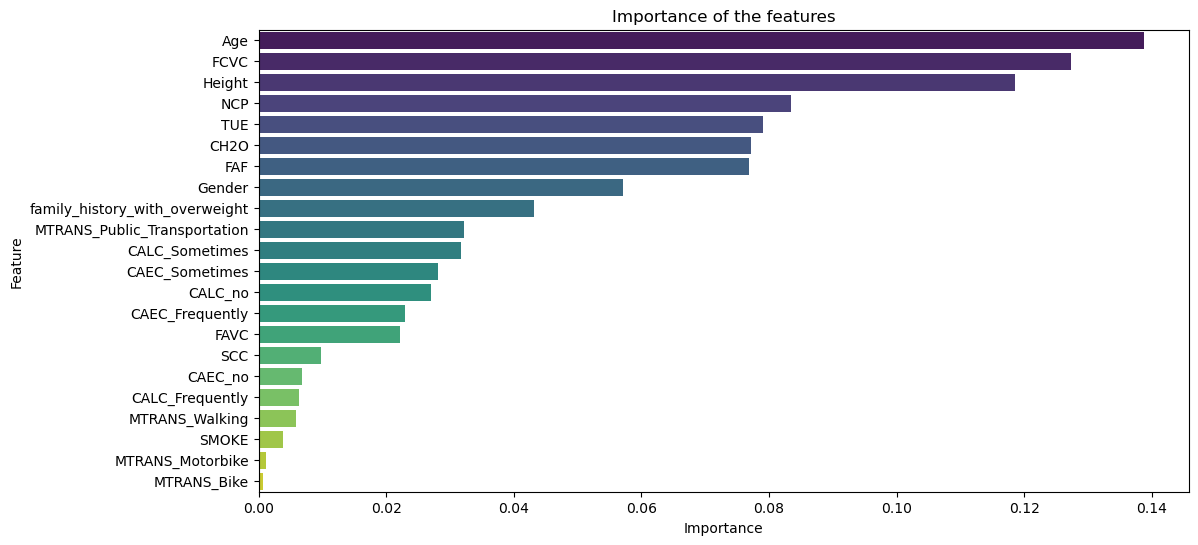

In [32]:
# Assuming 'model' is your trained RandomForestClassifier and 'X' is your feature matrix
feature_importances = model.feature_importances_

# Create a DataFrame to associate feature names with their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
top_features = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the top features
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
plt.title('Importance of the features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

###### Here we can see that Weight has the most importance of all the features. But features like age and height were also of great importance.

In [33]:
# Define the new entry data
new_entry_data = {
    'Gender': 0,  # Replace with 'Male' or 'Female'
    'Age': 25.0,  # Replace with the age of the new participant
    'Height' : 180,
    'family_history_with_overweight': 0,  # Replace with 'yes' or 'no'
    'FAVC': 1,  # Replace with 'yes' or 'no'
    'FCVC': 3.0,  # Replace with the frequency of consumption of vegetables
    'NCP': 3.0,  # Replace with the number of main meals
    'SMOKE': 0,  # Replace with 'yes' or 'no'
    'CH2O': 2.0,  # Replace with the consumption of water daily
    'SCC': 0,  # Replace with the value for 'SCC'
    'FAF': 2.0,  # Replace with the value for 'FAF'
    'TUE': 2.0,  # Replace with the value for 'TUE'
    'MTRANS_Bike': 1,  # Replace with 1 if 'Bike' is the chosen transportation, otherwise 0
    'MTRANS_Motorbike': 0,  # Replace with 1 if 'Motorbike' is the chosen transportation, otherwise 0
    'MTRANS_Public_Transportation': 0,  # Replace with 1 if 'Public_Transportation' is the chosen transportation, otherwise 0
    'MTRANS_Walking': 0,  # Replace with 1 if 'Walking' is the chosen transportation, otherwise 0
    'CAEC_Frequently': 0,  # Replace with 1 if 'Frequently' is the CAEC value, otherwise 0
    'CAEC_Sometimes': 1,  # Replace with 1 if 'Sometimes' is the CAEC value, otherwise 0
    'CAEC_no': 0,  # Replace with 1 if 'no' is the CAEC value, otherwise 0
    'CALC_Frequently': 0,  # Replace with 1 if 'Frequently' is the CALC value, otherwise 0
    'CALC_Sometimes': 1,  # Replace with 1 if 'Sometimes' is the CALC value, otherwise 0
    'CALC_no': 0,  # Replace with 1 if 'no' is the CALC value, otherwise 0
}

# Convert the new entry data to a DataFrame
new_entry_df = pd.DataFrame([new_entry_data])

new_entry_df

,Gender,Age,Height,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,SCC,...,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no
0,0,25.0,180,0,1,3.0,3.0,0,2.0,0,...,1,0,0,0,0,1,0,0,1,0


In [34]:
y_pred = model.predict(new_entry_df)

